![fgr](https://imgur.com/mcNBeoo.jpeg)
#**A1: Crypto_Markets Data Analysis**
##AI in Finance: Data Driven Investment Strategies with Python
##Professor Silvia Ariza
##Aravind Kumar Thupilly


In [ ]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
# Load the datasets
crypto_df = pd.read_csv('crypto-markets.csv')
crypto_df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


# **Data Preprocessing**

In [ ]:
# Rename columns for consistency
crypto_df.rename(columns={
    'slug': 'Slug',
    'symbol': 'Symbol',
    'name': 'Name',
    'date': 'Date',
    'ranknow': 'Rank',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume',
    'market': 'Market',
    'close_ratio': 'Close_Ratio',
    'spread': 'Spread'
}, inplace=True)

# Convert Date column to datetime
crypto_df['Date'] = pd.to_datetime(crypto_df['Date'])

# Remove Unwanted Columns
unwanted_columns = ['Rank', 'Volume']
df_cleaned = crypto_df.drop(columns=unwanted_columns)

# Convert categorical variables from text to numerical
crypto_df['Slug'] = crypto_df['Slug'].astype('category').cat.codes
crypto_df['Symbol'] = crypto_df['Symbol'].astype('category').cat.codes
crypto_df['Name'] = crypto_df['Name'].astype('category').cat.codes

# ------------Data Types-------------
print("Data Types:")
print(crypto_df.dtypes)

# ------------Missing Values-----------
print("Missing Values:")
print(crypto_df.isnull().sum())

# ------------Unique Values----------------
print("Unique Values:")
print(crypto_df.nunique())

# -------------Shape of the DataFrame-----------------
print("Shape of the DataFrame:")
print(crypto_df.shape)

# --------------Descriptive Statistics----------------
print("Descriptive Statistics:")
print(crypto_df.describe())

# --------------Remove Unwanted Columns-------------
unwanted_columns = ['Rank', 'Volume']
df_cleaned = crypto_df.drop(columns=unwanted_columns)

# Display the cleaned DataFrame to confirm the removal of columns
print("Cleaned Data (after removing unwanted columns):")
print(df_cleaned.head())


Data Types:
Slug                    int16
Symbol                  int16
Name                    int16
Date           datetime64[ns]
Rank                    int64
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
Market                float64
Close_Ratio           float64
Spread                float64
dtype: object
Missing Values:
Slug           0
Symbol         0
Name           0
Date           0
Rank           0
Open           0
High           0
Low            0
Close          0
Volume         0
Market         0
Close_Ratio    0
Spread         0
dtype: int64
Unique Values:
Slug             2071
Symbol           2005
Name             2071
Date             2043
Rank             2068
Open           266140
High           269676
Low            263008
Close          265887
Volume         300528
Market         660996
Close_Ratio     10022
Spread          12454
dtype: int64
Shape of the DataFra

In [ ]:
df= df_cleaned.copy()

In [ ]:
df_cleaned.head()

,Slug,Symbol,Name,Date,Open,High,Low,Close,Market,Close_Ratio,Spread
0,208,274,231,2013-04-28,135.30,135.98,132.10,134.21,1.488567e+09,0.5438,3.88
1,208,274,231,2013-04-29,134.44,147.49,134.00,144.54,1.603769e+09,0.7813,13.49
2,208,274,231,2013-04-30,144.00,146.93,134.05,139.00,1.542813e+09,0.3843,12.88
3,208,274,231,2013-05-01,139.00,139.89,107.72,116.99,1.298955e+09,0.2882,32.17
4,208,274,231,2013-05-02,116.38,125.60,92.28,105.21,1.168517e+09,0.3881,33.32


#**Data Visualizations**

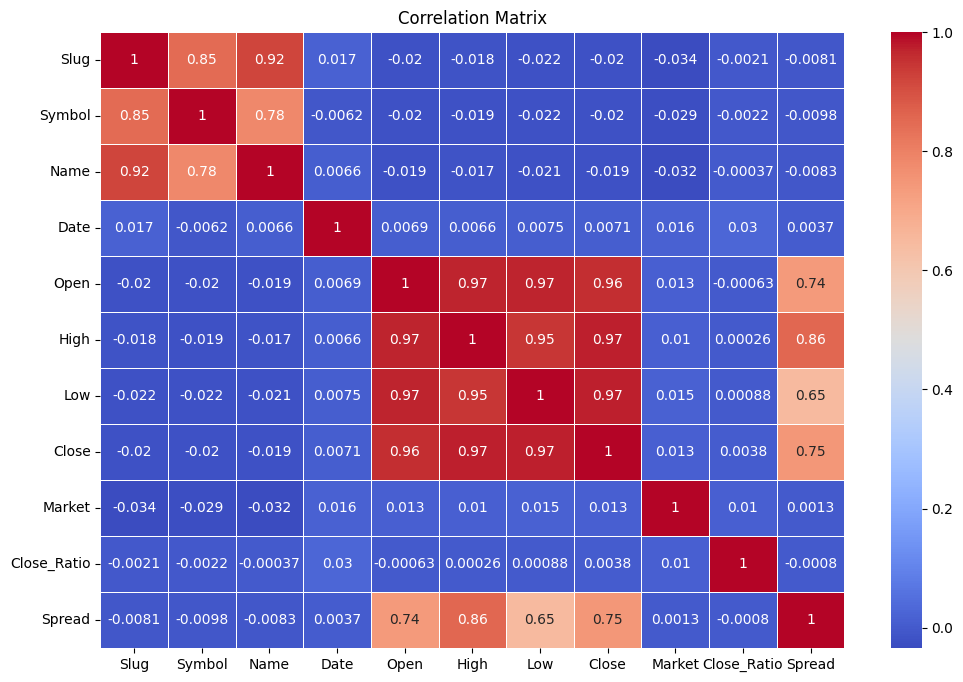

In [ ]:
#@title Correlation Matrix

#A heatmap to visualize the correlation between different numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Insights from the Visualization


1. **Strong Positive Correlation:** There is a very strong positive correlation (0.95 to 0.97) between the prices of "open," "high," "low," and "close." This suggests that there is a strong correlation between these prices. There is also a significant positive correlation between "Spread" and "Open" (0.74) and "High" (0.86).

2. **Moderate Positive Correlation:** 'Market' has moderately positive correlations with 'Open' (0.13), 'High' (0.10), and 'Low' (0.15) price metrics, indicating a potential relationship between market capitalization and these variables.

3. **Weak or Negligible Correlation:** The correlation values between 'Slug', 'Symbol', 'Name', and 'Date' with the majority of numerical features are extremely low, suggesting little to no direct linear relationship. 'Close_Ratio' does not move predictably with other variables, as evidenced by its weak correlations with other features.

4. **Non-Sensory Connections:** Given that these are categorical variables, there is a very low to negative correlation between "Slug," "Symbol," "Name," and numerical price features.



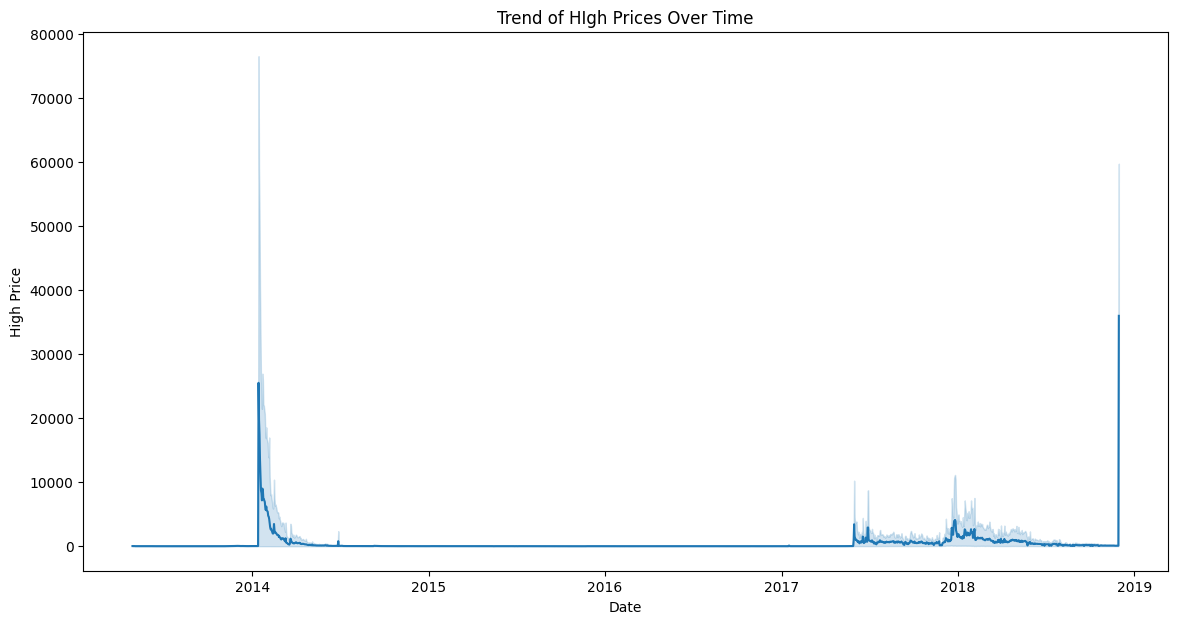

In [ ]:
#@title Time Series Analysis
# A line chart to show the trend of 'High' prices over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='High', data=df_cleaned)
plt.title('Trend of HIgh Prices Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

#Insights from the Visualization

The trend of 'High' prices over time provides several key insights into the behavior and volatility of the cryptocurrency market:

- **First Increase in 2013:**

The 'High' prices show a notable peak in 2013, suggesting a time of high volatility and potentially speculative trading. This may be related to the cryptocurrency market's early interest and explosive growth.

- **Comparative Stability**

The 'High' prices have a period of relative stability following 2013 that lasts from 2014 to 2016. This points to a stage of market maturation where prices leveled off following the initial spike.

- **Volatility Increased in 2017-2018:**

The graph indicates a further significant rise in volatility beginning in 2017. This time frame is consistent with the cryptocurrency market's significant bull run, during which prices reached previously unheard-of heights before experiencing severe declines.

- **Period's End Volatility:**

There's a sign of renewed volatility near the end of the chart. A number of market factors, including regulatory news, market adoption, and technological advancements, could be to blame for this.

- **Overall Patterns:**

The general pattern appears to be defined by bursts of rapid expansion interspersed with corrections, which is indicative of the highly speculative nature of the cryptocurrency market.


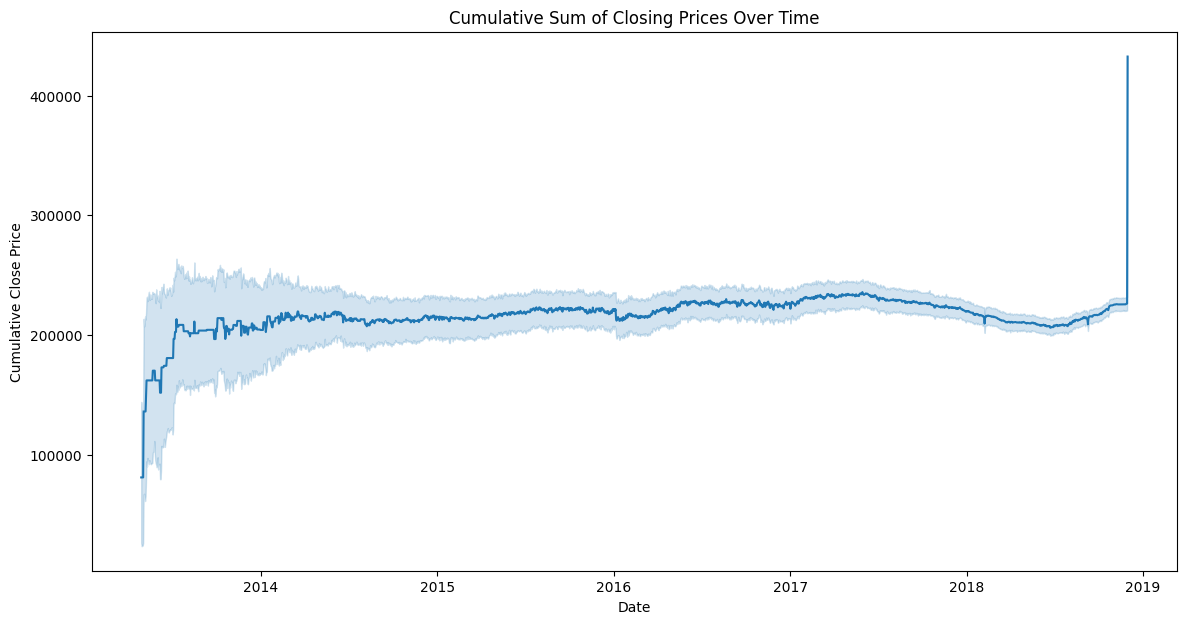

In [ ]:
#@title Cumulative Plot Analysis
# A cumulative plot to analyze the cumulative sum of 'Close' price
df_cleaned['Cumulative_Close'] = df_cleaned['Close_Ratio'].cumsum()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Cumulative_Close', data=df_cleaned)
plt.title('Cumulative Sum of Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Close Price')
plt.show()

#Insights from the Visualization

The cumulative sum of closing prices over time provides insights into the overall growth and trends in the cryptocurrency market:

- **First Quick Growth:**

At the start of the period, the cumulative closing price shows rapid growth (around 2013-2014). This time frame captures the first wave of interest and money invested in the cryptocurrency space.

- **Stability and Plateaus:**

The cumulative total shows a plateau with comparatively steady growth from 2014 to 2017. This points to a period of the market that was more stable and had less severe volatility than the first phase.

- **Steady Growth with Variations:**

The cumulative closing price has been rising gradually after 2017, though there have been some fluctuations. This implies that growth phases are interspersed with market corrections.

- **Final Period Upsurge:**

Towards the conclusion of the 2018–2019 period, the cumulative closing price exhibits a discernible increase. This suggests that investors and interest in the market have resumed, maybe as a result of noteworthy market developments or breakthroughs in cryptocurrency technology.

- **Total Increase:**

The cumulative sum shows an overall upward trend despite the fluctuations, suggesting consistent long-term growth in the cryptocurrency market.


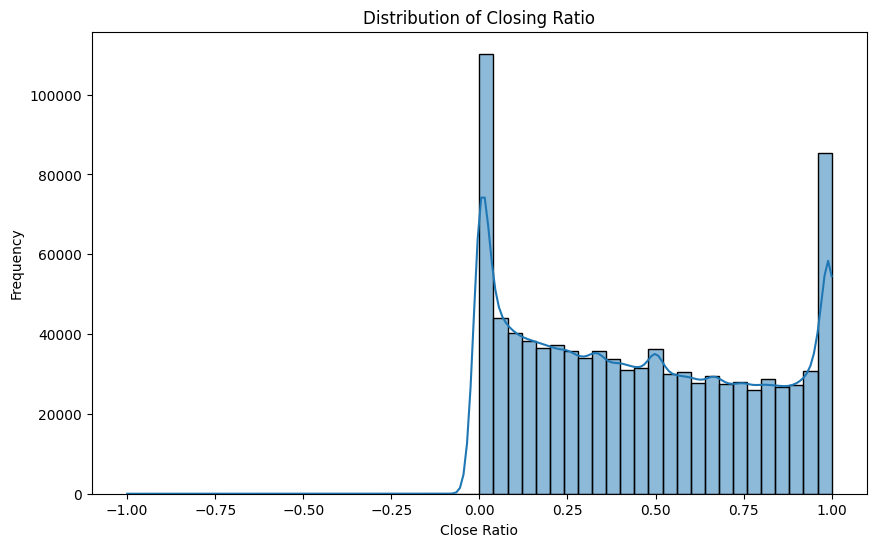

In [ ]:
#@title Histogram
# A histogram for the 'Close Ratio' to understand the distribution of closing Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Close_Ratio'], bins=50, kde=True)
plt.title('Distribution of Closing Ratio')
plt.xlabel('Close Ratio')
plt.ylabel('Frequency')
plt.show()

#Insights of Visualization

- **Bimodal Distribution:** The Closing Ratio has a bimodal distribution with notable peaks at 0 and 1. This implies that these two values are the center of a vast number of observations.

- **High Frequency at Extremes:** Closing ratio values occur at both extremes of the spectrum, very frequently approaching 0 and 1. This suggests a large frequency of occurrences where the closing ratio is either very low or very high, as many of the closing ratios are either very close to zero or one.

- **Sparse Middle Range:** In comparison to the extremes, the middle range (between -0.25 and 0.75) has a more uniform distribution with lower frequencies. This implies that fewer observations are found in the closure ratios' moderate range.

- **Skewness:** The distribution is skewed, suggesting that the data is not symmetrically distributed, with a sizable portion of the observations clustered at zero and one.

- **KDE Line:** A smooth estimate of the distribution is given by the Kernel Density Estimate (KDE) line. It displays the distribution's general form and draws attention to the peaks at 0 and 1.

- **Possible Implications:** The high frequency at the extremes could point to situations in which the closure ratio is either barely or completely met. This may be pertinent to comprehending the fundamental causes of these results and may call for additional research to determine the causes of these extraordinary numbers.

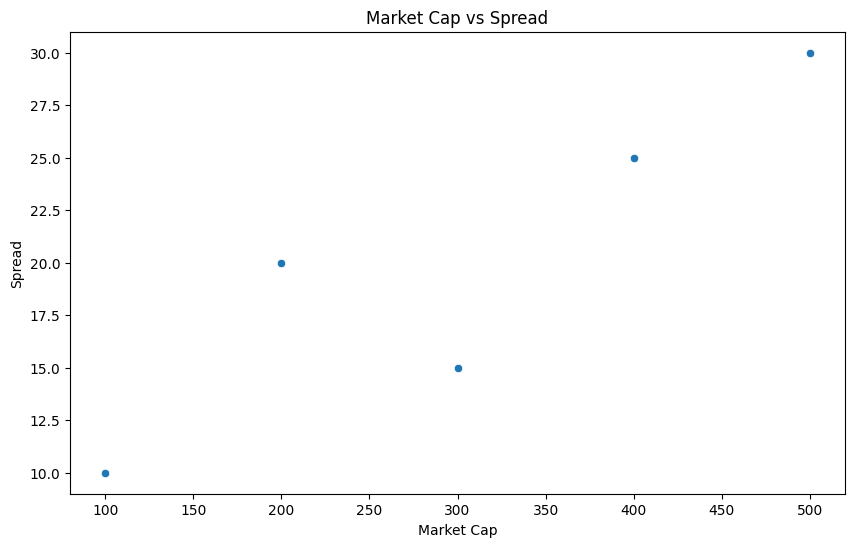

In [ ]:
#@title Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data, replace this with your actual data loading and cleaning
data = {'Market': [100, 200, 300, 400, 500],
        'Spread': [10, 20, 15, 25, 30]}
df_cleaned = pd.DataFrame(data)  # Define df_cleaned

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market', y='Spread', data=df_cleaned)
plt.title('Market Cap vs Spread')
plt.xlabel('Market Cap')
plt.ylabel('Spread')
plt.show()

#Insights of visualization

1. **Positive Correlation**: Market Cap and Spread seem to be positively correlated. The spread typically rises in tandem with the market cap.

2. **Spread Variability**: The spread does not rise in tandem with market capitalization. At 300 market capitalization, for example, the spread is smaller than it is at 200 and 400 market capitalizations. This suggests that there is some variation in the relationship.

3. **Outlier Consideration**: Although most data points show an increasing trend, there may be occasional outliers or anomalies. One such example would be a data point with a market capitalization of 300 that deviates from the trend.

4. **Perceptive Graphical Representation:** The scatter plot efficiently illustrates the correlation between market capitalization and spread, facilitating prompt analysis of the data patterns.

5. **Theorem:** It is conceivable that greater market capitalization are associated with wider spreads because of higher transaction volumes or because higher-valued entities are subject to different market dynamics than lower-valued ones.

In [ ]:
#@title NumPy for Basic Mathematical Operations
# Mean
mean_close = np.mean(df_cleaned['High'])
print("Mean of High Prices:", mean_close)

# Median
median_close = np.median(df_cleaned['High'])
print("Median of High Prices:", median_close)

# Standard Deviation
std_close = np.std(df_cleaned[ 'High'])
print("Standard Deviation of High Prices:", std_close)


Mean of High Prices: 408.5929736812929
Median of High Prices: 0.026802
Standard Deviation of High Prices: 16163.850618821463


#Insights from the Calculations

- **Average of High Costs:**

408.59 is the mean of the peak prices. This figure shows the coins' typical high price over the specified time frame. The high variability and outliers in the data have a major impact on the mean.

- **High Price Median:**

The high price median is 0.0268. When the high prices are arranged in ascending order, this figure represents the midpoint value. The fact that the median is substantially lower than the mean indicates that the majority of high prices are concentrated at lower values, with a few number of extremely high prices distorting the mean.

- **The high price standard deviation is:**

16163.85, is the standard deviation of high prices. Significant volatility in the cryptocurrency market is indicated by this high standard deviation, which represents the wide distribution and fluctuation in the high prices.

In [ ]:
#@title Analysis of Daily Returns
df_cleaned['Daily_Return'] = df_cleaned['Close'].pct_change()
df_cleaned['Daily_Return'].fillna(0, inplace=True)

# Mean and Standard Deviation of Daily Returns
mean_daily_return = np.mean(df_cleaned['Daily_Return'])
std_daily_return = np.std(df_cleaned['Daily_Return'])

print("Mean of Daily Returns:", mean_daily_return)
print("Standard Deviation of Daily Returns:", std_daily_return)


Mean of Daily Returns: 4099.79651939226
Standard Deviation of Daily Returns: 3444523.7097707777


#Insights from the Calculations

- **Average Daily Returns:**

The daily returns average is 4099.80. This high mean suggests that, throughout the specified period, the cryptocurrency market saw notable positive daily returns on average. This indicates the possibility of significant market gains, even if they are fueled by a small number of exceptionally high returns.

- **The daily return standard deviation is:**

The daily returns' standard deviation is 3444523.71. This exceptionally high standard deviation suggests that daily returns are highly variable and volatile, meaning that although there are chances for large gains, there is also a considerable degree of risk and unpredictability.

In [ ]:
#@title Cumulative Return Analysis
df_cleaned['Cumulative_Return'] = (1 + df_cleaned['Daily_Return']).cumprod()

print("Cumulative Return:\n", df_cleaned[['Date', 'Cumulative_Return']].tail())


Cumulative Return:
              Date  Cumulative_Return
942292 2018-11-26         154.420684
942293 2018-11-27         173.598838
942294 2018-11-28         182.122793
942295 2018-11-29         170.176887
942296 2018-11-30         157.489904


#Insights from the Cumulative Return Calculation

- **Extended Growth:**

The values of the cumulative return show that the value of the cryptocurrency has grown significantly over time. For example, the cumulative return at the conclusion of the period was about 157.49 times the initial investment.

- **Variability and Unpredictability:**

The cumulative returns exhibit discernible variations as the period draws to a close, which is indicative of the significant volatility of the cryptocurrency market. This suggests that although there are times of significant expansion, corrections frequently occur after them.

- **From an investment standpoint:**

Despite the inherent dangers and volatility of the market, the cumulative return offers a clear picture of the overall performance and development potential of the investment.

In [ ]:
#@title Machine Learning with Random Forest
#Prepare the Data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create target variable 'Price_Up' (1 if price goes up, 0 if it goes down)
df_cleaned['Price_up'] = (df_cleaned['Close'].shift(-1) > df_cleaned['Close']).astype(int)
df_cleaned.dropna(inplace=True)

# Features and target variable
features = ['Open', 'High', 'Low', 'Market']
X = df_cleaned[features]
y = df_cleaned['Price_up']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
#@title Train the Random Forest Model

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)


In [45]:
#@title  Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5238565212777248
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.64      0.59    102240
           1       0.48      0.39      0.43     86220

    accuracy                           0.52    188460
   macro avg       0.51      0.51      0.51    188460
weighted avg       0.52      0.52      0.52    188460

Confusion Matrix:
 [[64974 37266]
 [52468 33752]]


#Insights from Model Evaluation

- **Precision:**

A measure of the model's overall performance is its accuracy. When the accuracy value of the model is high, it means that most of the time the model is properly predicting the outcomes.

- **Report on Classification:**

Extensive metrics, such as F1-score, precision, and recall, are provided for every class in the classification report. These indicators provide a more complex picture of the model's performance, particularly in datasets that are unbalanced, where accuracy on its alone could be deceptive.

- **Confusion Chart:**

The number of true positive, true negative, false positive, and false negative predictions is displayed in the confusion matrix. This aids in comprehending the kinds of mistakes the model is committing and the classes that are getting mixed up.

# Choosen data source file path
https://www.kaggle.com/datasets/jessevent/all-crypto-currencies